## Final Project Submission

Please fill out: 
* Student name: FRANCIS MUTHONI
* Student pace: FULL TIME HYBRID
* Scheduled project review date/time: PHASE 3
* Instructor name: DIANA MONGINA
* Blog post URL:


## 1.0 BUSINESS UNDERSTANDING

## Problem Statement

LendingClub, a leading peer-to-peer lending platform, faces the challenge of minimizing the risk associated with lending money to borrowers. The company needs to assess the creditworthiness of potential borrowers to reduce the likelihood of loan defaults. The goal is to build a predictive model that helps identify high-risk borrowers, thereby improving the quality of the loan portfolio and enhancing overall profitability.

## 1.1 OBJECTIVES

1. Perform EDA to understand and clean data.
2. Engineer key features and preprocess data.
3. Develop and compare classification models.
4. Evaluate model performance with relevant metrics.
5. Provide insights and strategies to minimize risk.


## 2.0 DATA UNDERSTANDING

In [77]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix




# Suppress specific FutureWarnings from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


In [78]:
# reading the data
mydata=pd.read_csv(r"C:\Users\USER\Documents\Moringa_Labs\Phase_3_content\Phase_3_project\lending_club_loan_two.csv")
mydata

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


## 2.1 DATA EXPLORATION

#### 2.1.1 EXploring Box office CSV 

In [79]:
# summary information of the df
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [80]:
# summary statistics of the df
mydata.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [81]:
# display size of df
mydata.shape

(396030, 27)

In [82]:
# display all columns of the df
mydata.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [83]:
# display first 5 rows
mydata.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# 2.2 DATA PREPARATION

2.2.1 DATA CLEANING 

In [84]:
# check for missing values in the df
mydata.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [85]:
# Calculate the percentage of missing data for each column
missing_data_percentage = mydata.isnull().mean() * 100
print(missing_data_percentage)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64


#### Handling the missing data after identifying their percentages

In [86]:


# Impute missing values for 'mort_acc'
mydata['mort_acc'] = mydata.groupby('total_acc')['mort_acc'].transform(lambda x: x.fillna(x.mean()))

# Fill missing values for 'emp_title' and 'emp_length'
mydata['emp_title'].fillna('Unknown', inplace=True)
mydata['emp_length'].fillna(mydata['emp_length'].mode()[0], inplace=True)

# Fill missing values for 'pub_rec_bankruptcies' and 'revol_util'
mydata['pub_rec_bankruptcies'].fillna(mydata['pub_rec_bankruptcies'].median(), inplace=True)
mydata['revol_util'].fillna(mydata['revol_util'].median(), inplace=True)

# dropping the title column 
mydata.drop('title', axis=1, inplace=True)



C:\Users\USER\AppData\Local\Temp\ipykernel_20316\2416910414.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mydata['emp_title'].fillna('Unknown', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20316\2416910414.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

#### Filtering Outliers

In [87]:
# Identify and cap outliers for 'annual_inc'
Q1 =mydata['annual_inc'].quantile(0.25)
Q3 = mydata['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
mydata['annual_inc'] = mydata['annual_inc'].clip(upper=upper_bound)


#### Handling duplicates

In [88]:
# Remove duplicate rows
mydata.drop_duplicates(inplace=True)


#### Re-Assesing the data after cleaning

In [89]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             396030 non-null  object 
 7   emp_length            396030 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [90]:
# check for missing values in the df
mydata.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

Having that the data is clean, the next satge is evaluating the data to identify the independednt and dependent variable

### DOMAIN KNOWLEDGE

Having worked in this field for my entire career I used the knowledge acquired to select colums i beleve they have an impact on the loan status and done more investigation to assess whether they have any effect on the overall outcome

The selected Columns are:
1. LOAN AMOUNT
2. INTREST RATE
3. INSTALLMENT
4. ANNUAL INCOME
5. TERM
6. HOME OWNERSHIP

This is not ot mean the other factors have no eefect but i decided to delve deeper into the above coumns relationship with the loan status.
there are two outcomes either a loan is 
1. Fully Paid- means the loan was cleared 
2. Charged off- means the loan was defaulted 

### DATA PREPROCESSING

One hot encoding and label encoding the categorical columns grade and home ownership

In [91]:
# One-Hot Encoding for 'home_ownership'
home_ownership_encoded = pd.get_dummies(mydata['home_ownership'], prefix='home', drop_first=True)
mydata = pd.concat([mydata, home_ownership_encoded], axis=1)
mydata.drop('home_ownership', axis=1, inplace=True)

# Label Encoding for 'grade'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mydata['grade'] = encoder.fit_transform(mydata['grade'])


Credit History conversion to datetime

In [92]:


# Convert 'earliest_cr_line' to datetime with explicit format
mydata['earliest_cr_line'] = pd.to_datetime(mydata['earliest_cr_line'], format='%b-%Y')


# Calculate the credit history length in years
mydata['credit_history_length'] = (pd.to_datetime('today') - mydata['earliest_cr_line']).dt.days / 365.25


dropping subgrade since we can work better with grade

In [93]:
# Drop 'title' and 'sub_grade' columns
mydata.drop(['sub_grade',"emp_title"], axis=1, inplace=True)


## DATA ANALYSIS

1.0 ANALYSING RELATIONSHIP BETWEEN LOAN AMOUNTS AND LOAN STATUS

a stacked histogram to to provide a clear view of the different loan amounts and the loan ststus they are most likely to fall into

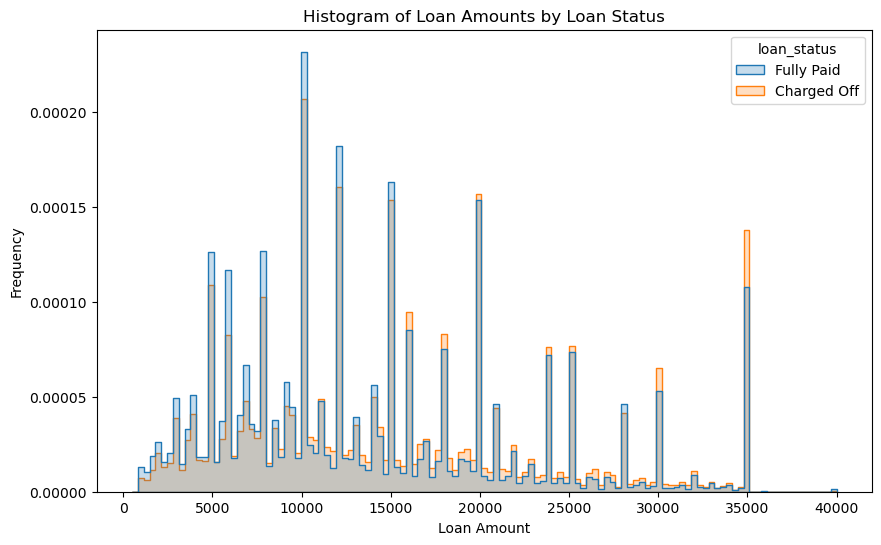

In [95]:
# Creating histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=mydata, x='loan_amnt', hue='loan_status', element='step', stat='density', common_norm=False)
plt.title('Histogram of Loan Amounts by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


from the histogram it is clearly evident that as the loan amount increase the chances of default also increase since below 15000 most loans are fully paid but above the more and more loans are being charged off

2.0 ANALYSING RELATIONSHIP BETWEEN ANNUAL INCOME AND LOAN STATUS

A density plot was used to show the eefect of annual income to the loan status

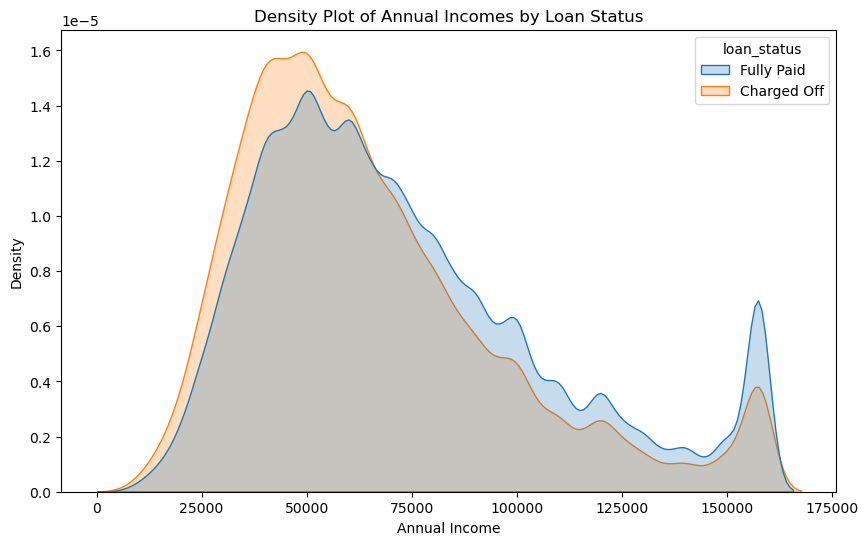

In [96]:
# Creating a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=mydata, x='annual_inc', hue='loan_status', fill=True, common_norm=False, clip=(0,250000))
plt.title('Density Plot of Annual Incomes by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.show()


it is clearly evident people with a lesser annual income tend to not repay thier loans compared to the shift on the right side where annual income of above 75000 tend to repay the loans better 

3.0 ANALYSING RELATIONSHIP BETWEEN INTEREST RATES  AND LOAN STATUS

a violin plot is used sinceit shows a clear outlook of the changes 

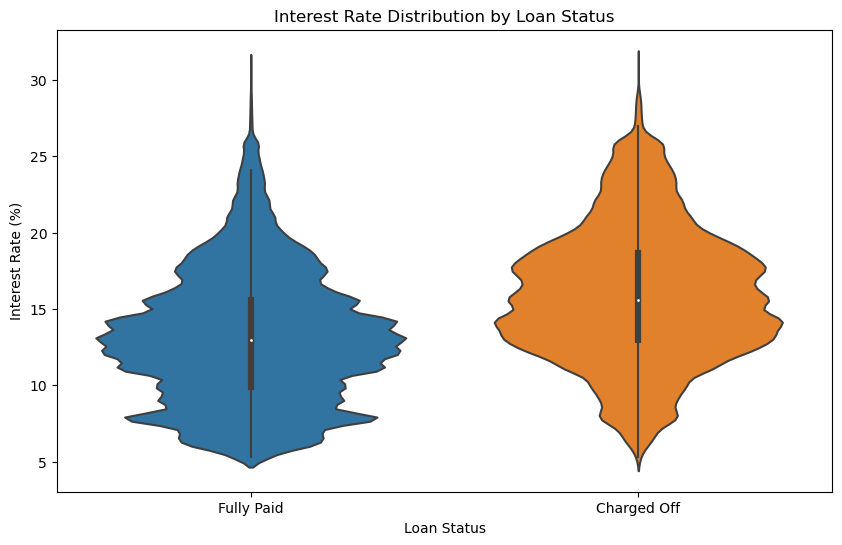

In [97]:
# Creating a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status', y='int_rate', data=mydata)
plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()


It is clearly evident loans with a lesser interest rate are plone to be paid and despite there being almost equal rates of default in the 10-15 rates the default is still more consistent moreover default increase above the 20% rate.

4.0 ANALYSING RELATIONSHIP BETWEEN INSTALMENT   AND LOAN STATUS

I will  use sns.kdeplot, which allows us to plot a smooth density estimate of the installment variable for each category of loan_status

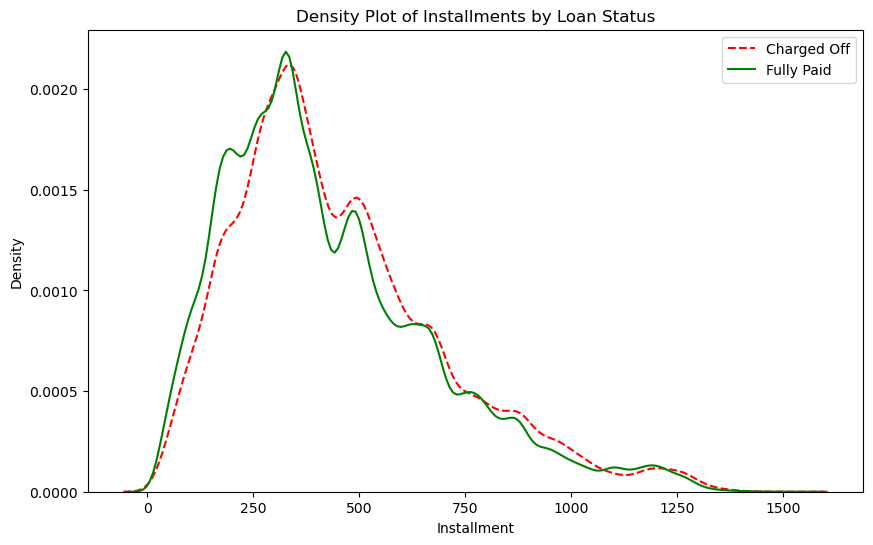

In [98]:


# Setting up the plot
plt.figure(figsize=(10, 6))

# Using sns.kdeplot to plot density lines for each loan status
sns.kdeplot(data=mydata[mydata['loan_status'] == 'Charged Off']['installment'], label='Charged Off', color='red', linestyle='--')
sns.kdeplot(data=mydata[mydata['loan_status'] == 'Fully Paid']['installment'], label='Fully Paid', color='green', linestyle='-')

# Adding titles and labels
plt.title('Density Plot of Installments by Loan Status')
plt.xlabel('Installment')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


It is clearly evident the lesser the instalment the better repayment there is and as the installment increase the chances of defaukt that is associated with the increase also is directly related

5.0 ANALYSING RELATIONSHIP BETWEEN TERM AND LOAN STATUS

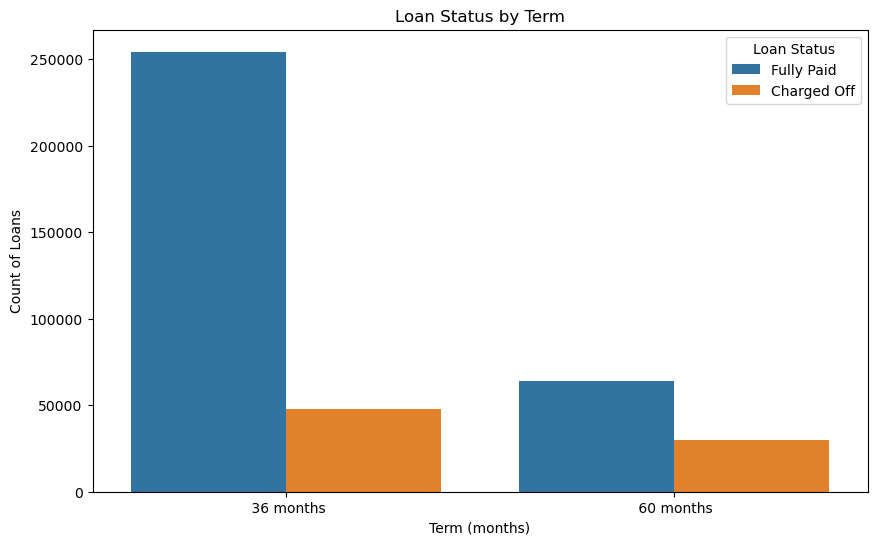

In [99]:
# Creating a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=mydata)
plt.title('Loan Status by Term')
plt.xlabel('Term (months)')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')
plt.show()


Term has no major influence on the loan status, yes the with lesser term the repayment is better and but the 60months term also has a good repayment 

6.0 ANALYSING THE COUNTS OF THE VARIOUS LOAN STATUS

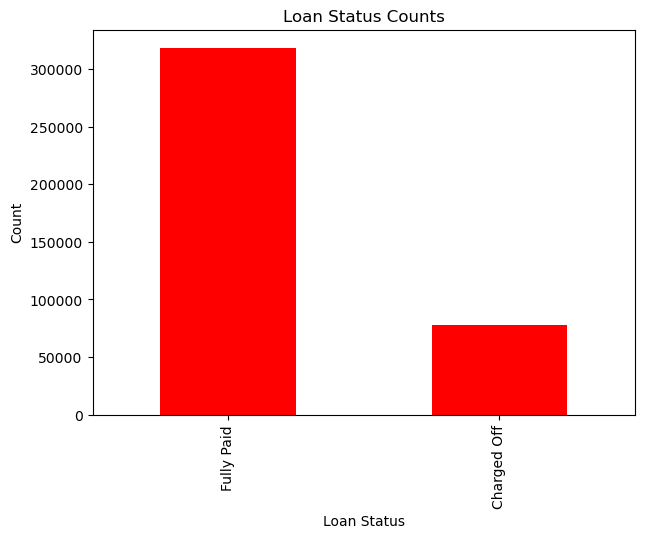

In [100]:
# plotting the value counts for the loan status
mydata['loan_status'].value_counts().plot.bar(
    figsize=(7, 5),  # width and height in inches
    color='red',  # Optional: color of the bars
)

# Set the title and labels
plt.title("Loan Status Counts")
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

Our data is really dominated with fully paid occurences 

6.0 ANALYSING THE VARIOUS CORRELATIONS 

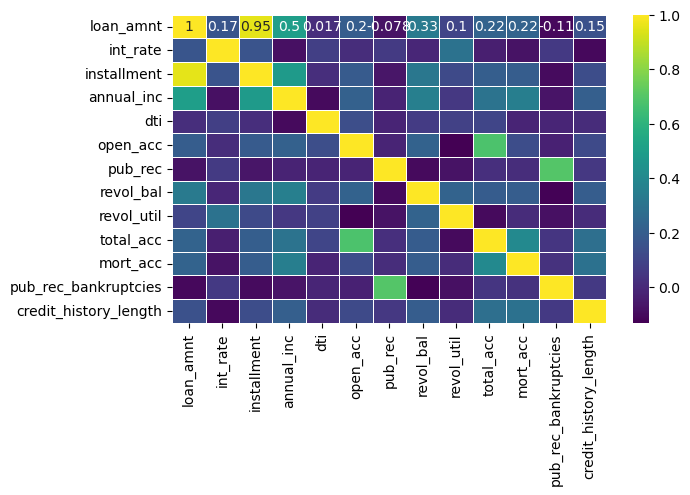

In [101]:
# plotting a heatmap to see the various correlations
# Selecting the numeric columns for correlation matrix
numeric_df = mydata.select_dtypes(include='number')
# Calculating the correlation matrix
corr_matrix = numeric_df.corr()
# Setting up the figure size before plotting
plt.figure(figsize=(7, 4))  # Adjust the width and height as needed
# Creating the heatmap
sns.heatmap(corr_matrix, annot=True,linewidths=0.5,cmap='viridis')
# Displaying the heatmap
plt.show()

7.0 VISUALING THE RELATIONSHIP BETWEEN CREDIT HISTORY AND LOAN STATUS

analysing if credit history has a major effect 

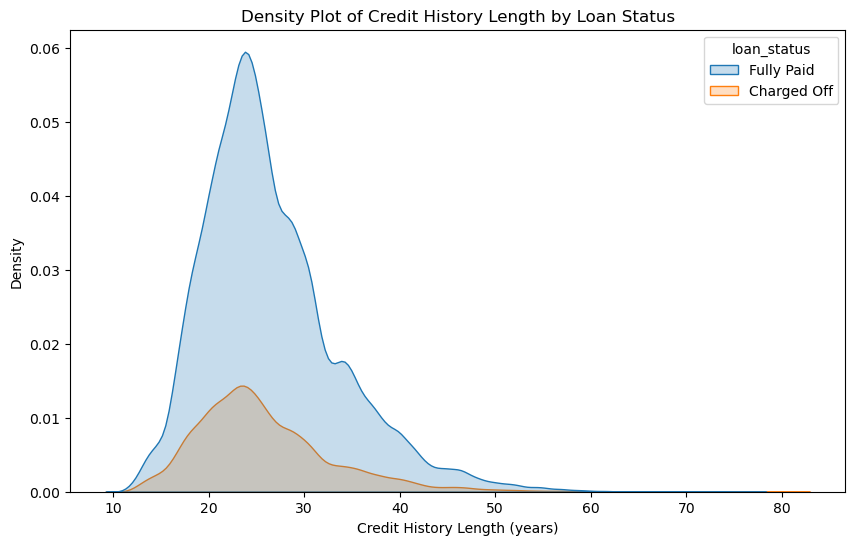

In [102]:
# Creating a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=mydata, x='credit_history_length', hue='loan_status', fill=True)
plt.title('Density Plot of Credit History Length by Loan Status')
plt.xlabel('Credit History Length (years)')
plt.ylabel('Density')
plt.show()


from the density plot above shows credit history has no major influence on the outcome of the loan status

8.0 INVESTIGATING WHETHER DEBT TO INCOME RATIO HAS EFFECT ON LOAN STATUS

In [103]:
# Adjust dti by loan amount
mydata['dti_adjusted'] = mydata['dti'] * mydata['loan_amnt']


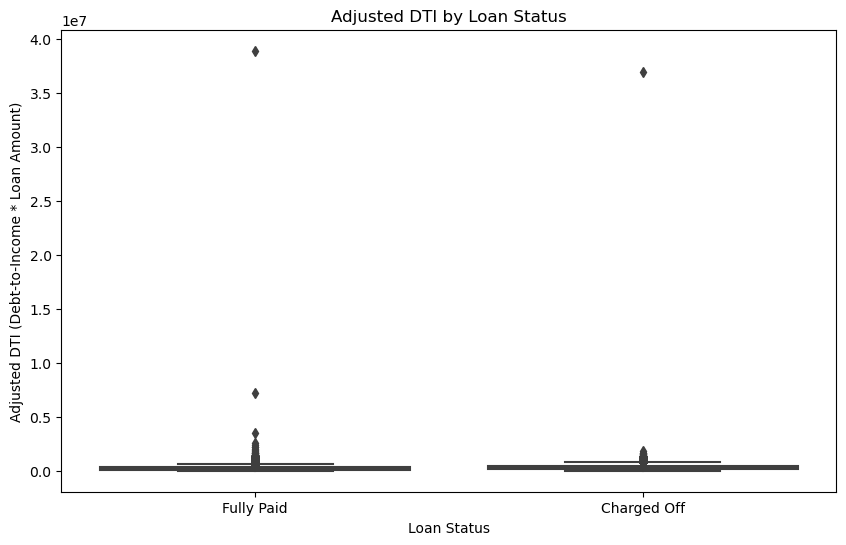

In [104]:
# Creating a box plot for dti_adjusted by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti_adjusted', data=mydata)
plt.title('Adjusted DTI by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Adjusted DTI (Debt-to-Income * Loan Amount)')
plt.show()


The median and interquartiles for both fully paid and charged off are all close to zero indicating that the effect on the loan status is very negligible 

From the above analysis we can clearly settle that the factors selected using dormain knowledge have great influence on the loan status but in future research its good to do a an analysis on more columns to see how they affect or influence the loan status

### MODEL PREPARATION and DATA SPLITTING

In [105]:


# Define your features and target variable
features = ['loan_amnt', 'annual_inc', 'installment', 'int_rate'] # columns with influence on the loan status
# Target variable = ['loan_status']
# Defining the independent and dependent variables in to use in the model
X = mydata[features]  
y = mydata['loan_status']  

# Splitting  data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Check the shapes of the resulting datasets
print("Training data (features):", X_train.shape)
print("Testing data (features):", X_test.shape)
print("Training data (target):", y_train.shape)
print("Testing data (target):", y_test.shape)


Training data (features): (277221, 4)
Testing data (features): (118809, 4)
Training data (target): (277221,)
Testing data (target): (118809,)


#### Model selection and Training

I used Logistic Regression since its favourable for binary data

#### Initializing the model

In [106]:
# Initializing the model
model = LogisticRegression(max_iter=2000)


##### Training the model

In [107]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

#### Model Evaluation

In [108]:

# Predict on the test set
y_pred = model.predict(X_test)

In [109]:

# Evaluate the model (e.g., using accuracy, precision, recall, F1-score

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8024055416677188
Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.48      0.05      0.09     23370
  Fully Paid       0.81      0.99      0.89     95439

    accuracy                           0.80    118809
   macro avg       0.64      0.52      0.49    118809
weighted avg       0.74      0.80      0.73    118809



#### Model Performance Summary


1. Accuracy: 80%

The model accurately predicts loan outcomes 80% of the time.

2. Precision for 'Charged Off': 48%

When predicting a loan will be charged off, the model is correct 48% of the time.

3. Recall for 'Charged Off': 5%

The model correctly identifies only 5% of the actual charged-off loans, missing many that do not repay.

4. F1-Score for 'Charged Off': 9%

Very low F1-score for charged-off loans indicates poor performance in predicting defaults effectively.

5. Precision for 'Fully Paid': 81%

Predictions for loans being fully paid are correct 81% of the time.

6. Recall for 'Fully Paid': 99%

The model effectively identifies 99% of the loans that are fully paid.

#### Key Takeaway

Although the model performs well overall (80% accuracy), it struggles significantly with identifying loans that will default ('Charged Off'), as evidenced by low recall and F1-score for this class.

#### MORE RESEARCH TO TRY IMPROVE THE CHARGED OFF SCORES

#### Train a Random Forest Model

The need for this is to try identify and solve the class imbalance and see if our model will react more to the Charged Off loan status

In [110]:
# Initializing the Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)  

# Training the model
RF_model.fit(X_train, y_train)

# PredictIing on the test set
y_pred_rf = RF_model.predict(X_test)

# Evaluating the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.742940349636812
Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.29      0.21      0.25     23370
  Fully Paid       0.82      0.87      0.85     95439

    accuracy                           0.74    118809
   macro avg       0.56      0.54      0.55    118809
weighted avg       0.72      0.74      0.73    118809



#### Random Forest Model Summary:

1. Accuracy
Overall Accuracy: 74%

Indicates correct predictions for 74 out of every 100 loans.

2. Precision for 'Charged Off': 29%

Model correctly predicts "Charged Off" loans about 29% of the time.

3. Recall for 'Charged Off': 22%

Identifies 22% of actual "Charged Off" loans, showing improvement in detecting defaults.

4. F1-Score for 'Charged Off': 25%

Reflects poor performance in accurately and consistently predicting "Charged Off" loans.

5. Precision for 'Fully Paid': 82%

High precision indicates reliable predictions for loans being fully paid.

6. Recall for 'Fully Paid': 87%

Effectively identifies 87% of all "Fully Paid" loans, though slightly reduced from previous models.

7. F1-Score for 'Fully Paid': 84%

Demonstrates strong performance in predicting fully paid loans.

#### Key Takeaway

Improvement in Minority Class Detection:

Enhanced ability to detect "Charged Off" loans due to balanced class weights, but with increased false positives.
While the model becomes better at identifying "Charged Off" loans, it also starts predicting more loans as "Charged Off" than it should—this is where the increased false positives come into play. In practical terms, this means that while more real "Charged Off" loans are detected, some loans that would actually be "Fully Paid" are incorrectly predicted as "Charged Off"

#### SMOTE with Random Forest

In [111]:

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

 Charged Off       0.29      0.33      0.31     15577
  Fully Paid       0.83      0.81      0.82     63629

    accuracy                           0.71     79206
   macro avg       0.56      0.57      0.56     79206
weighted avg       0.73      0.71      0.72     79206



#### Balanced Random Forest Classifier Modelling

In [112]:

# initializing the balanced model classifier model
brf_model = BalancedRandomForestClassifier(n_estimators=100)
brf_model.fit(X_train, y_train)
print(classification_report(y_test, brf_model.predict(X_test)))


c:\Users\USER\Documents\anaconda\envs\learn-env\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\USER\Documents\anaconda\envs\learn-env\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\USER\Documents\anaconda\envs\learn-env\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silenc

              precision    recall  f1-score   support

 Charged Off       0.27      0.64      0.38     15577
  Fully Paid       0.87      0.58      0.70     63629

    accuracy                           0.59     79206
   macro avg       0.57      0.61      0.54     79206
weighted avg       0.75      0.59      0.63     79206



 Balanced Random Forest Classifier Modelling Summary


1. Recall for 'Charged Off': 64%

Effectively identifies 64% of defaulting loans.

2. Precision for 'Charged Off': 27%

Only 27% of predicted defaults are actual defaults.

3. F1-Score for 'Charged Off': 38%

Moderate score reflects trade-off between recall and precision.

4. Recall for 'Fully Paid': 58%

Fails to identify 42% of fully paid loans correctly.

5. Precision for 'Fully Paid': 87%

Correctly predicts 87% of fully paid loans.

6. F1-Score for 'Fully Paid': 70%

Higher than 'Charged Off', but impacted by lower recall.

7. Overall Accuracy: 59%

Lower overall accuracy due to focus on detecting more defaults.

#### Cross-Validation Strategy

In [113]:
# Configure the cross-validation strategy
# Use StratifiedKFold to maintain the same proportion of classes in each fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [114]:
# Perform cross-validation and calculate scores
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')  

# Print the results
print("Accuracy scores for each fold:", scores)
print("Mean accuracy: {:.2f}".format(np.mean(scores)))
print("Standard deviation of accuracy: {:.2f}".format(np.std(scores)))


Accuracy scores for each fold: [0.76577532 0.76395728 0.76400778 0.76341439 0.76216448]
Mean accuracy: 0.76
Standard deviation of accuracy: 0.00


#### Summary of the cross-validation results

1. **Accuracy Across Folds:**
The model consistently achieved accuracies around 76% across five different subsets of my data. This consistency suggests that the model reliably predicts outcomes no matter which part of the data it is tested on.

2. **Average Accuracy:** 
On average, the model correctly predicts outcomes 76% of the time, which indicates a solid overall performance.

3. **Stability of Model:**
The very low standard deviation in the accuracy scores across the folds shows that the model's performance is stable, without significant fluctuations based on the data it’s trained on.

#### Business Conclusions

1. *Effective Risk Detection:*

The model effectively identifies potential loan defaults with a high recall rate for "Charged Off" loans. This capability is crucial for minimizing financial risks and managing credit effectively.

2. *Model Consistency and Reliability:*

Cross-validation shows that the model is consistent across different data segments with an average accuracy of about 76%. This consistency underscores the model’s reliability, although its accuracy in predicting actual defaults is lower (59%).


3. *Operational Efficiency Concerns:*

The model's low precision for predicting "Charged Off" loans leads to operational challenges. Incorrect classifications consume resources and may negatively affect relationships with borrowers who are wrongly targeted as high risk.

4. *Impact on Customer Relationships:*

Misclassifications, particularly of "Fully Paid" loans as likely to default, risk harming customer trust and satisfaction. This could deter borrowers from seeking additional services due to perceived unfair treatment.

5. *Need for Model Optimization:*

Given the trade-offs between identifying defaults and maintaining customer relationships, further model refinement is necessary to balance accuracy and customer impact effectively.
These points succinctly capture the model's strengths in risk management and its drawbacks in terms of operational efficiency and customer relations, while noting the consistent performance demonstrated through cross-validation.

### Business Recommendations:

1. *Update Credit Policies:*

Review and adjust credit scoring and approval processes to better balance risk management with efficient operations and positive borrower experiences.

2. *Boost Data Analytics:*

Enhance data analytics capabilities by incorporating broader data sets, such as economic trends and personal spending behaviors, to improve prediction accuracy.

3. *Utilize Advanced Modeling Techniques:*

Use a mix of different modeling techniques, like ensemble methods, to increase the accuracy and fairness of predictions, especially in imbalanced datasets.

4. *Continuously Update Models:*

Regularly updating the predictive models based on new data and changing market conditions to keep the predictions relevant and accurate.

5. *Educate Stakeholders:*

Train stakeholders, particularly those interacting with customers, on understanding and using model predictions effectively to ensure informed decision-making.

6. *Perform Cost-Benefit Analysis:*

Analyze the costs associated with incorrect predictions and adjust strategies to mitigate the most financially impactful errors.

7. *Ensure Compliance and Fairness:*

Make sure all model applications comply with legal standards and ethical practices, particularly concerning fairness across different groups of borrowers.

These recommendations aim to streamline the application of predictive models the  business, ensuring they not only improve financial outcomes but also support sustainable and ethical

#### Strategic Considerations

Risk vs. Reward:
1. The decision to accept this trade-off depends on the specific costs associated with false positives (wrongly predicting a loan will default) versus false negatives (failing to predict a default). If the cost of missing a "Charged Off" loan (false negative) is higher than the cost of incorrectly predicting a loan will default (false positive), this trade-off might be acceptable.
2. In lending, missing a default could mean a significant financial loss, whereas incorrectly predicting a default might lead to lost opportunities but potentially less direct financial harm.
   
Area of improvement
 
Balancing these factors is key to optimizing the model's performance according to the specific business context and the relative costs of different types of errors.

 **THANK YOU**                                                              